In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import platform
import matplotlib
from matplotlib import font_manager, rc

# '-' 기호 보이게 하기
matplotlib.rcParams['axes.unicode_minus'] = False

# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    plt.rcParams['font.family'] = font_name
# 맥
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    plt.rc('font', family='NanumBarunGothic')

# 0. 파일 불러오기

In [155]:
data1 = pd.read_csv('data/join_lpoint/purchase_customer_category_br_info.csv', encoding='cp949', parse_dates=[6])
data2 = pd.read_csv('data/join_lpoint/cop_customer_br_info.csv', encoding='cp949', parse_dates=[5, 6])

In [4]:
lpay_cust = pd.read_csv('data/lpay_customer_info.csv', index_col=0)
lpay_cust

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am,ma_fem_dv,ages,zon_hlv
0,M629656521,210803210311226,A03,1,20210803,21,10900,남성,40대,Z04
1,M216016456,210803130167542,L01,2,20210803,13,6860,여성,40대,Z04
2,M205142844,210803140275112,A02,1,20210803,14,9000,여성,60대,Z17
3,M737010483,210803040637594,A06,2,20210803,4,36740,남성,40대,Z16
4,M707775545,210803140675502,A06,2,20210803,14,138500,남성,30대,Z11
...,...,...,...,...,...,...,...,...,...,...
353179,M470112503,210125110644545,A06,2,20210125,11,51800,여성,50대,Z16
353180,M470112503,210104210652271,A06,2,20210104,21,6440,여성,50대,Z16
353181,M748878049,210119200278240,A02,1,20210119,20,17600,여성,30대,Z10
353182,M748878049,210119180267206,A02,1,20210119,18,12400,여성,30대,Z10


# 1. L.POINT 사용 분석

In [45]:
# 장바구니 당 lpay 이용 여부 데이터 생성
df1 = data1[["고객 분류", "장바구니 식별 번호", "온/오프라인 구분", "제휴사 구분 코드", "구매 점포 구분 코드",
           "구매 일자", "구매 시간", "고객 성별", "고객 연령대", "고객 거주 지역 대분류 코드",
           "점포 지역 대분류 코드", "점포 지역 중분류 코드", "LPoint"]].drop_duplicates()
df1_lp_y = df1.loc[df1['LPoint']==1]
df1_lp_n = df1.loc[df1['LPoint']==0]

In [32]:
# pie 그래프 함수 정의
def pie(ax, data):
    df = data.value_counts()
    ax.pie(df, labels=df.index, autopct='%.1f%%')

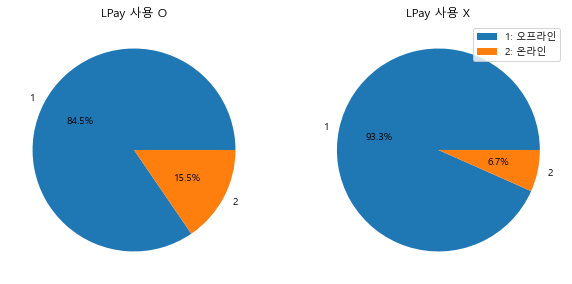

In [33]:
# 온/오프라인 비율
plt.figure(figsize=(10, 5))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

pie(ax1, df1_lp_y['온/오프라인 구분'])
pie(ax2, df1_lp_n['온/오프라인 구분'])

ax1.set_title('LPay 사용 O')
ax2.set_title('LPay 사용 X')

ax2.legend(['1: 오프라인', '2: 온라인'])

plt.show()

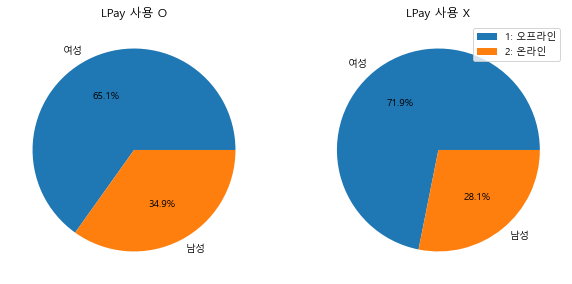

In [34]:
# 고객 성별 비율
plt.figure(figsize=(10, 5))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

pie(ax1, df1_lp_y['고객 성별'])
pie(ax2, df1_lp_n['고객 성별'])

ax1.set_title('LPay 사용 O')
ax2.set_title('LPay 사용 X')

ax2.legend(['1: 오프라인', '2: 온라인'])

plt.show()

In [77]:
# 추이 함수 정의
def date_counter(data, col):
    df = data[col].value_counts().sort_index()
    sns.lineplot(data=df)

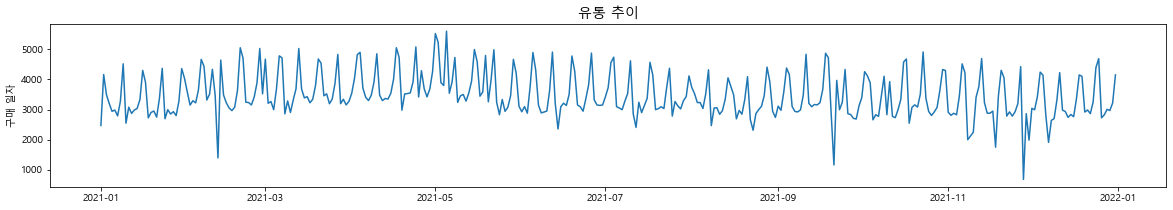

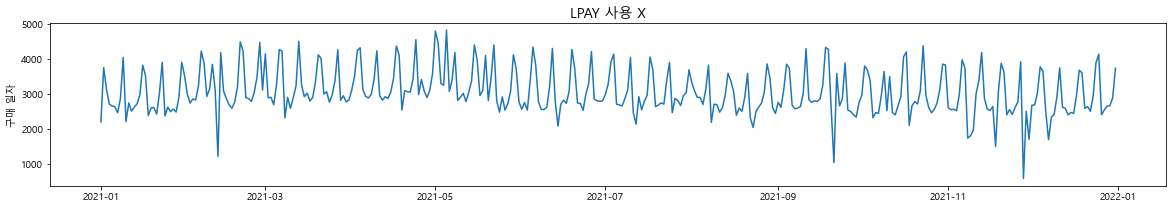

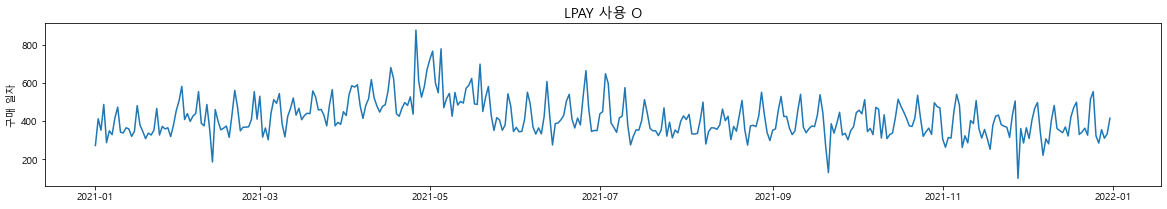

In [81]:
plt.figure(figsize=(20, 3))
plt.title('유통 추이', fontsize=14)
date_counter(df1, '구매 일자')

plt.figure(figsize=(20, 3))
plt.title('LPAY 사용 X', fontsize=14)
date_counter(df1_lp_n, '구매 일자')

plt.figure(figsize=(20, 3))
plt.title('LPAY 사용 O', fontsize=14)
date_counter(df1_lp_y, '구매 일자')

In [84]:
# 구매량 기준 날짜 추출 함수
def show_date(data, ud, criterion):
    df = data['구매 일자'].value_counts().to_frame()
    if ud == 'up':
        return df.loc[df['구매 일자']>criterion].sort_index()
    if ud == 'down':
        return df.loc[df['구매 일자']<criterion].sort_index()

In [87]:
# 유통업종 구매량이 상승되어있는 일자
show_date(df1, 'up', 5100)

,구매 일자
2021-05-01,5528
2021-05-02,5237
2021-05-05,5609


- 각각 토요일, 일요일, 어린이날로 휴일

In [85]:
# 유통업종 LPAY 사용량이 800건 이상인 일자
show_date(df1_lp_y, 'up', 800)

,구매 일자
2021-04-26,877


- 전체 구매량과 상이한 패턴이 나타난 날짜는 4월 26일

In [93]:
# 4월 26일 LPoint 사용 데이터
df_426 = data1.loc[(data1['구매 일자']=='2021-04-26')&(data1['LPoint']==1)]

In [100]:
# 4월 26일 구매 상품명 상위 10개
df_426['상품명'].value_counts().sort_values(ascending=False)[:10]

패스트푸드           341
식음료모바일상품권        84
기타남성의류세트         68
백화점/마트모바일상품권     56
생수               50
일반우유             46
복사용지             36
감자스낵             31
콜라               29
탄산수              29
Name: 상품명, dtype: int64

- 4월 26일 패스트푸드의 구매량이 크게 증가
- 식음료, 백화점/마트 모바일상품권

In [102]:
df_426['제휴사 구분 코드'].value_counts().sort_values(ascending=False)[:10]

A06    1357
A02     499
A01     354
A04     350
A03     262
A05       2
Name: 제휴사 구분 코드, dtype: int64

In [106]:
data1.loc[data1['제휴사 구분 코드']=='A06']['온/오프라인 구분'].value_counts()

2    97915
Name: 온/오프라인 구분, dtype: int64

- 제휴사 A06에 대한 구매량 상승
- A06은 온라인

In [113]:
# 날짜 슬라이싱 함수
def dates(data, start, end):
    df = data.loc[(data['구매 일자']>=f'2021-{start}')&(data['구매 일자']<f'2021-{end}')]
    return df

<AxesSubplot:ylabel='구매 일자'>

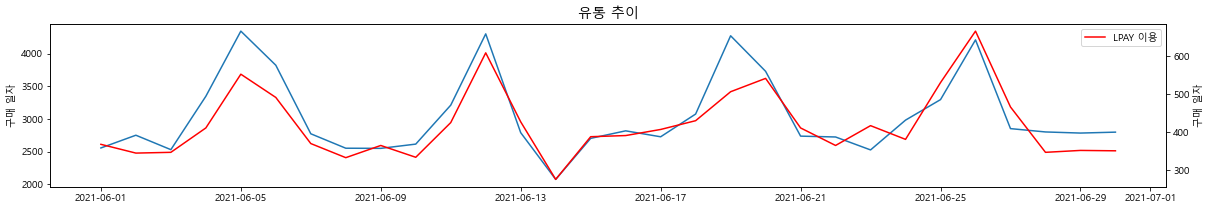

In [134]:
df = dates(df1, '06-01', '07-01')

plt.figure(figsize=(20, 3))
plt.title('유통 추이', fontsize=14)
date_counter(df.loc[df['LPoint']==0], '구매 일자')
plt.twinx()
sns.lineplot(data=df.loc[df['LPoint']==1]['구매 일자'].value_counts().sort_index(), color='red', label='LPAY 이용')

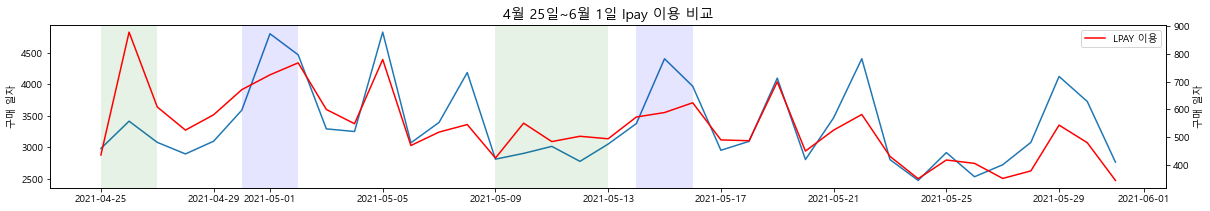

In [135]:
df = dates(df1, '04-25', '06-01')

plt.figure(figsize=(20, 3))
plt.title('4월 25일~6월 1일 lpay 이용 비교', fontsize=14)
date_counter(df.loc[df['LPoint']==0], '구매 일자')
plt.twinx()
sns.lineplot(data=df.loc[df['LPoint']==1]['구매 일자'].value_counts().sort_index(), color='red', label='LPAY 이용')

plt.axvspan('2021-04-25', '2021-04-27', facecolor='g', alpha=0.1)
plt.axvspan('2021-05-09', '2021-05-13', facecolor='g', alpha=0.1)

plt.axvspan('2021-04-30', '2021-05-02', facecolor='b', alpha=0.1)
plt.axvspan('2021-05-14', '2021-05-16', facecolor='b', alpha=0.1)

- LPAY 이용 상승 일자: 4월 26일, 5월 10일
- LPAY 이용 저하 일자: 5월 1일, 5월 15일

In [139]:
df2_lp_y = data2.loc[data2['LPoint']==1]
df2_lp_n = data2.loc[data2['LPoint']==0]

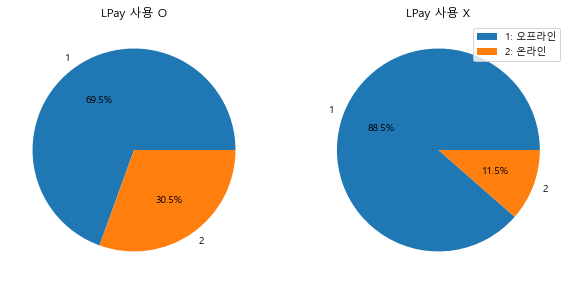

In [140]:
# 온/오프라인 비율
plt.figure(figsize=(10, 5))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

pie(ax1, df2_lp_y['온/오프라인 구분'])
pie(ax2, df2_lp_n['온/오프라인 구분'])

ax1.set_title('LPay 사용 O')
ax2.set_title('LPay 사용 X')

ax2.legend(['1: 오프라인', '2: 온라인'])

plt.show()

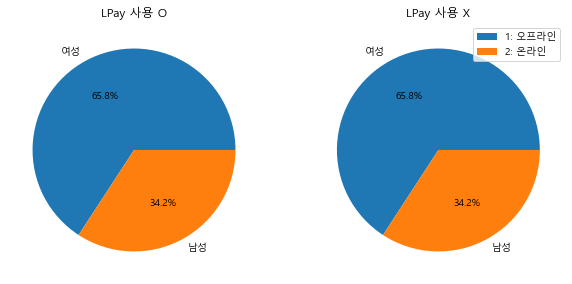

In [144]:
# 고객 성별 비율
plt.figure(figsize=(10, 5))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

pie(ax1, data2['고객 성별'])
pie(ax2, data2['고객 성별'])

ax1.set_title('LPay 사용 O')
ax2.set_title('LPay 사용 X')

ax2.legend(['1: 오프라인', '2: 온라인'])

plt.show()

In [156]:
# 제휴사 구분 코드에 맞춰 엽종 컬럼 생성
jh = {'A': '유통', 'B': '숙박업종', 'C': '엔터테인먼트', 'D': 'F&B', 'E': '렌탈업종', 'L': '기타 제휴사'}

data2['제휴사'] = data2['제휴사 구분 코드'].apply(lambda x: '비 제휴사' if x=='L01' else jh[x[0]])

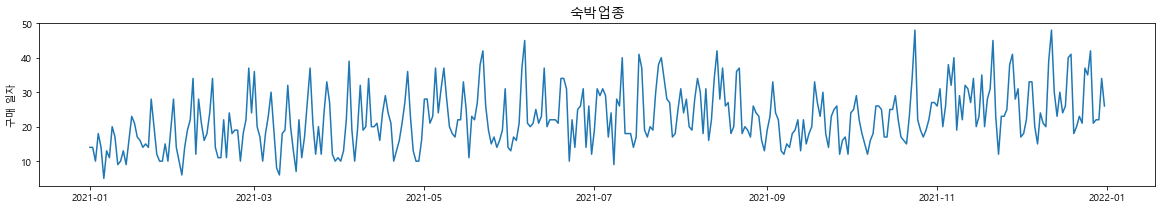

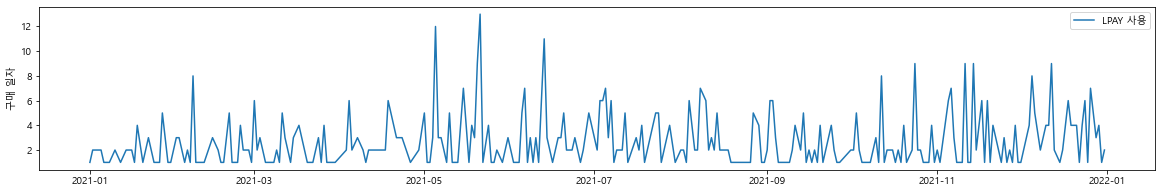

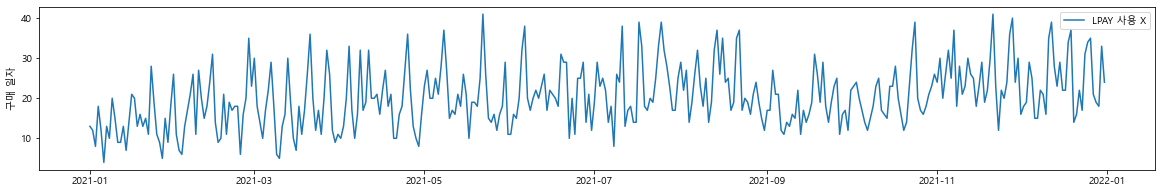

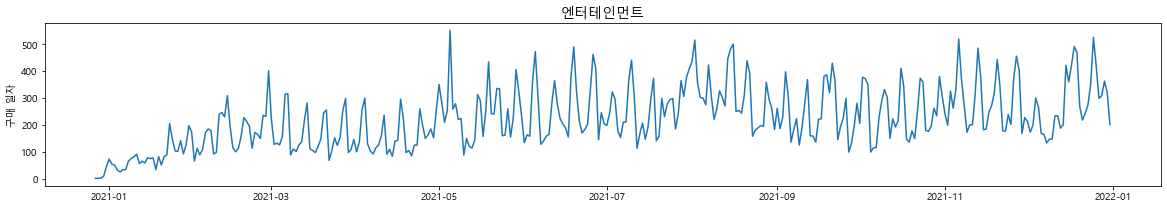

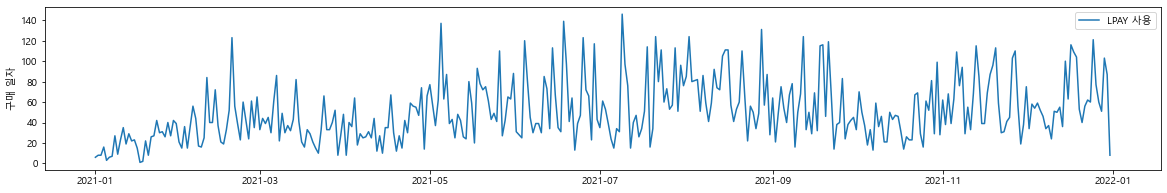

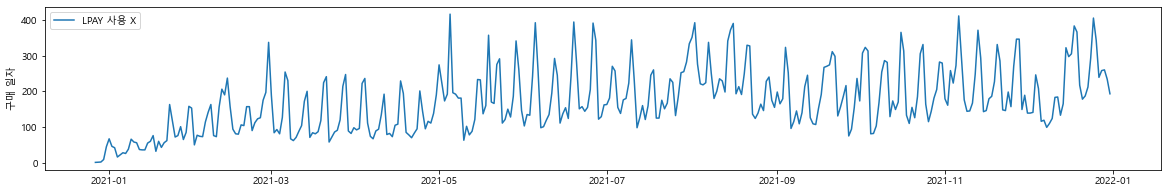

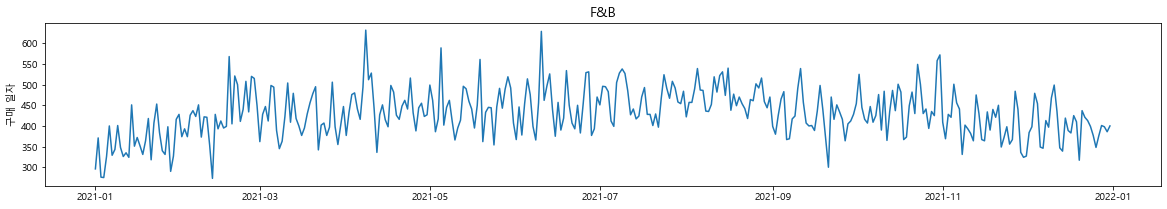

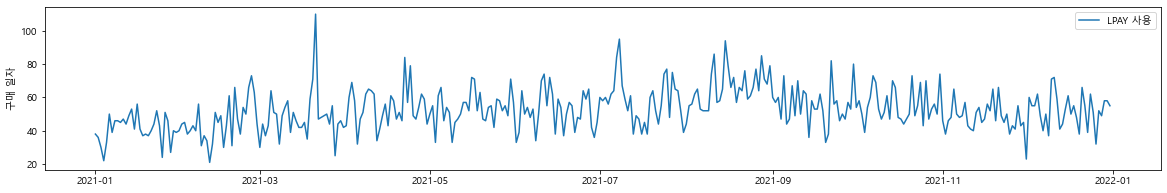

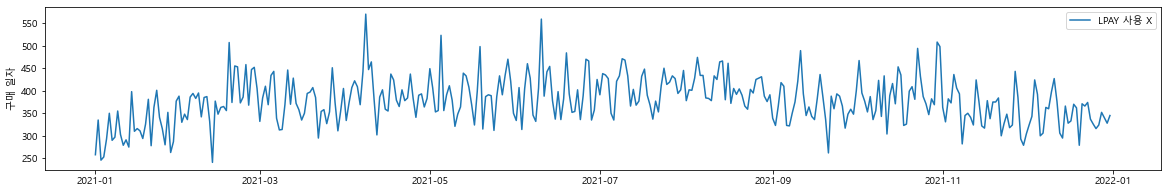

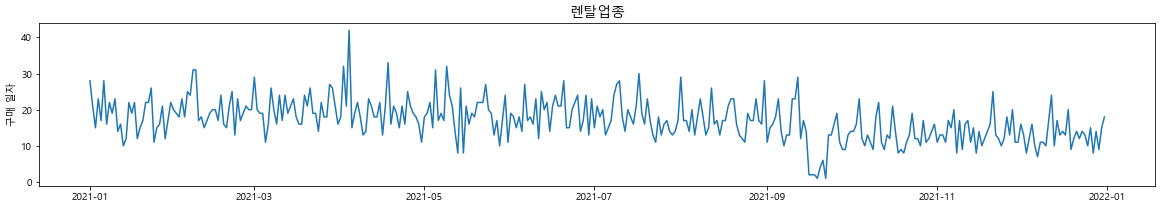

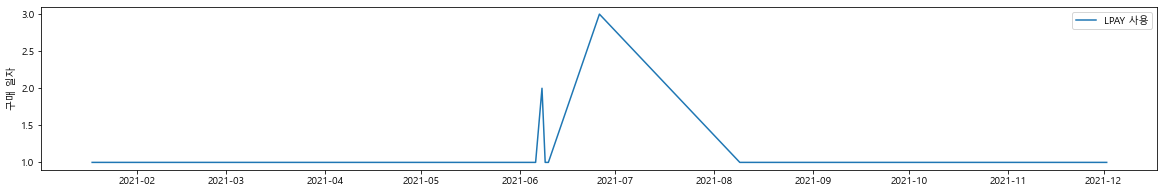

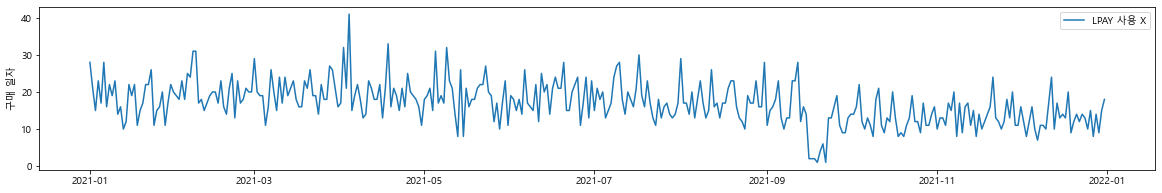

In [173]:
for j in ['숙박업종', '엔터테인먼트', 'F&B', '렌탈업종']:
    plt.figure(figsize=(20, 3))
    plt.title(j, fontsize=14)
    date_counter(data2.loc[data2['제휴사']==j], '구매 일자')

    plt.figure(figsize=(20, 3))
    date_counter(data2.loc[(data2['제휴사']==j)&(data2['LPoint']==1)], '구매 일자')
    plt.legend(['LPAY 사용'])

    plt.figure(figsize=(20, 3))
    date_counter(data2.loc[(data2['제휴사']==j)&(data2['LPoint']==0)], '구매 일자')
    plt.legend(['LPAY 사용 X'])

In [178]:
# 숙박업종
show_date(data2.loc[(data2['제휴사']=='숙박업종')&(data2['LPoint']==1)], 'up', 10)

,구매 일자
2021-05-05,12
2021-05-21,13
2021-06-13,11


In [179]:
# 엔터테인먼트
show_date(data2.loc[(data2['제휴사']=='엔터테인먼트')&(data2['LPoint']==1)], 'up', 130)

,구매 일자
2021-05-05,137
2021-06-18,139
2021-07-09,146
2021-08-28,131


In [184]:
df = dates(data2, '02-01', '03-01')
show_date(df.loc[(df['제휴사']=='엔터테인먼트')&(df['LPoint']==1)], 'up', 100)

,구매 일자
2021-02-19,123


In [188]:
# F&B
show_date(data2.loc[(data2['제휴사']=='F&B')&(data2['LPoint']==1)], 'up', 90)

,구매 일자
2021-03-21,110
2021-07-08,95
2021-08-15,94


# 2. 제휴사

In [159]:
JEHUE = pd.read_csv('data/JEHUE.csv')
JEHUE

,사용처,LPOINT,사용처 분류,온라인,오프라인,제휴사 구분
0,피자헛,1,외식,1.0,0.0,NaN
1,인스타워시,1,여가,1.0,0.0,NaN
2,롯데월드 어드벤처 부산,1,여가,1.0,1.0,NaN
3,(주)브리치,0,쇼핑,1.0,0.0,NaN
4,11번가,1,쇼핑,1.0,0.0,NaN
...,...,...,...,...,...,...
146,허그맘,1,교육/문화,0.0,1.0,NaN
147,호텔스닷컴,1,여가,1.0,0.0,NaN
148,환경부 전기차 충전소,1,여가,1.0,1.0,NaN
149,후지필름몰,1,쇼핑,1.0,0.0,NaN
